In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statistics as sta

In [2]:
#read the file
food = pd.read_csv('food_table.csv', encoding='big5')
food_number = food.copy() #use copy to avoid the same point
del food_number['food']
food_number.head()

,Protein,fat,Vitamin C,Fiber
0,19.42,12.73,0.0,0.0
1,1.80,0.70,35.0,0.0
2,1.28,0.10,36.6,2.5
3,1.80,0.20,30.0,1.6
4,17.44,8.10,0.0,0.0


In [3]:
len(food)

24

In [4]:
#trandform form the dataframe to matrix
food_array = food_number.as_matrix()

In [5]:
data  = food.values[:,1:5].astype(float)
adj_data = np.mean(data, axis=0)
#np.mean(adj_data[:

adj_data

array([  9.4775    ,   4.195     ,  17.70833333,   1.55      ])

In [6]:
data -= np.mean(data, axis = 0)

In [7]:
np.mean(data[:,0])

-9.6219328800846894e-16

# StandardScaler

In [8]:
# Standardization (shifts variables onto a uniform stand scale)
sc = StandardScaler() #if no () will show: fit() missing 1 required positional argument: 'X'
sc.fit(food_array)
food_number_nor = sc.transform(food_array)
food_number_nor[:5]

array([[ 1.21500438,  1.5542334 , -0.90563627, -0.80435864],
       [-0.93821435, -0.63644355,  0.88432718, -0.80435864],
       [-1.00175996, -0.74570425,  0.96615408,  0.492994  ],
       [-0.93821435, -0.72749413,  0.62861812,  0.02594705],
       [ 0.97304223,  0.71110503, -0.90563627, -0.80435864]])

# Run PCA

In [9]:
# PCA 
pca = PCA(n_components = 4) # set the number of component
pca.fit(food_number_nor)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Principal Components weighted

In [10]:
'''
Principal axes in feature space, representing the directions of maximum 
variance in the data. The components are sorted by explained_variance_.
'''
pca.components_

array([[ 0.53749686,  0.499929  , -0.48232233, -0.47805156],
       [ 0.35249002,  0.59789452,  0.48739254,  0.52983152],
       [-0.02400156, -0.00981336, -0.72210006,  0.69130249],
       [-0.7656839 ,  0.62649568, -0.09157069, -0.11334081]])

In [11]:
pca_w = pd.DataFrame()
pca_w['content'] = food.columns[1:]
pca_w['pc1'] = pca.components_[0]
pca_w['pc2'] = pca.components_[1]
pca_w['pc3'] = pca.components_[2]
pca_w['pc4'] = pca.components_[3]
pca_w

,content,pc1,pc2,pc3,pc4
0,Protein,0.537497,0.352490,-0.024002,-0.765684
1,fat,0.499929,0.597895,-0.009813,0.626496
2,Vitamin C,-0.482322,0.487393,-0.722100,-0.091571
3,Fiber,-0.478052,0.529832,0.691302,-0.113341


# Plot by PC1 & PC2

In [12]:
#select the first、second pca to plot
pca_12 = np.zeros((4,2))
pca_12[:,0] = pca.components_[0]
pca_12[:,1] = pca.components_[1]
pca_12

array([[ 0.53749686,  0.35249002],
       [ 0.499929  ,  0.59789452],
       [-0.48232233,  0.48739254],
       [-0.47805156,  0.52983152]])

In [13]:
#matrix muilt
plot = np.dot(food_number_nor, pca_12)

In [14]:
type(pca_12)

numpy.ndarray

C:\Users\Eric\Anaconda3\envs\DataSC\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


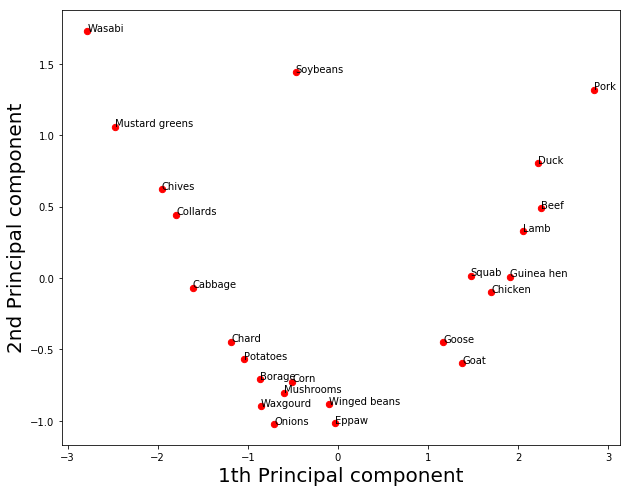

In [15]:
#plot 
plt.style.use('seaborn-bright')

fig = plt.figure(figsize=(10,8))

#主畫圖區
plt.scatter(plot[:,0],plot[:,1],c='r',marker='o',s=40)

#Add the string of food name at figure
key = food['food']
for i,txt in enumerate(np.array(key)):
    plt.annotate(txt, (plot[i,0],plot[i,1]))

#Label
#plt.title('Silhouette Coefficient', fontsize=30)    
plt.xlabel('1th Principal component', fontsize=20)
plt.ylabel('2nd Principal component', fontsize=20)
plt.legend()


plt.show()

# Scree Plot

In [16]:
ratio = pca.explained_variance_ratio_

In [17]:
plt.style.use('seaborn-bright')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111) #frameon= Tures


#set the x,y
xx = [1,2,3,4]
# y = ratio
x_trick = ['PC1', 'PC2', 'PC3', 'PC4']
ax.set_xticks(xx)
ax.set_xticklabels(k_trick)


#main plotting area
plt.plot(xx, ratio,c='#AAAAAA',lw=3)
plt.scatter(xx, ratio, marker='o', c='#AAAAAA',s=120)

#設定軸的刻度值字體大小
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

#Label
plt.title('', fontsize=25)    
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('% of Data Spread Accounted', fontsize=15)
plt.legend()

plt.show()

NameError: name 'k_trick' is not defined

# 其他

In [ ]:
# 比較(純變數相加)
first_x = food_number_nor[:,0] + food_number_nor[:,1]
second_x = food_number_nor[:,2] + food_number_nor[:,3]

#plot 
plt.style.use('seaborn-bright')

fig = plt.figure(figsize=(10,10))

#主畫圖區
plt.scatter(first_x,second_x,c='b',marker='o',s=30)

key = food['food']
for i,txt in enumerate(np.array(key)):
    plt.annotate(txt, (first_x[i],second_x[i]))


#Label
#plt.title('Silhouette Coefficient', fontsize=30)    
plt.xlabel('fat_Protein', fontsize=20)
plt.ylabel('VitaminC_Fiber', fontsize=20)
plt.legend()


plt.show()

In [ ]:
'''
#plot 
plt.style.use('seaborn-bright')

fig = plt.figure(figsize=(10,10))

#主畫圖區
plt.scatter(plot[:,0],plot[:,1],c='r',marker='o',s=30)

#Label
for i,txt in enumerate(np.array(key)):
    plt.annotate(txt, (plot[i,0],plot[i,1]))
    
#plt.title('Silhouette Coefficient', fontsize=30)    
plt.xlabel('2th Principal component', fontsize=20)
plt.ylabel('1th Principal component', fontsize=20)
plt.legend()


plt.show()

'''

In [41]:
u0 = np.mean(food_number_nor[:,0])
u1 = np.mean(food_number_nor[:,1])
u2 = np.mean(food_number_nor[:,2])
u3 = np.mean(food_number_nor[:,3])

In [42]:
food_number_nor[:,0] = food_number_nor[:,0] - u0
food_number_nor[:,1] = food_number_nor[:,1] - u1
food_number_nor[:,2] = food_number_nor[:,2] - u2
food_number_nor[:,3] = food_number_nor[:,3] - u3

In [44]:
MM = np.cov(food_number_nor)
MM.shape

(24, 24)

In [45]:
NN = np.cov(food_number_nor.T)
NN.shape

(4, 4)

In [46]:
eig_vaM, eig_vcM = np.linalg.eig(MM)
eig_vaN, eig_vcN = np.linalg.eig(NN)

In [50]:
eig_vaM

array([  2.09945277e+01 +0.00000000e+00j,
         3.51209769e+00 +0.00000000e+00j,
         2.25220857e+00 +0.00000000e+00j,
        -1.07611619e-15 +0.00000000e+00j,
        -4.86779940e-16 +3.62545781e-16j,
        -4.86779940e-16 -3.62545781e-16j,
         6.54982735e-16 +2.36042455e-17j,
         6.54982735e-16 -2.36042455e-17j,
         5.46772691e-16 +0.00000000e+00j,
        -2.77318960e-16 +1.74548725e-16j,
        -2.77318960e-16 -1.74548725e-16j,
         2.82812485e-16 +0.00000000e+00j,
        -2.76482835e-16 +0.00000000e+00j,
        -1.94924899e-16 +5.73384572e-17j,
        -1.94924899e-16 -5.73384572e-17j,
         1.41327379e-16 +0.00000000e+00j,
         9.15060888e-17 +1.94715129e-17j,
         9.15060888e-17 -1.94715129e-17j,
        -4.08864333e-17 +4.24177143e-17j,
        -4.08864333e-17 -4.24177143e-17j,
        -3.84229903e-17 +0.00000000e+00j,
        -6.88713348e-18 +0.00000000e+00j,
         3.29918697e-17 +2.20436221e-18j,   3.29918697e-17 -2.20436221e-18j]

In [48]:
eig_vaN

array([ 2.74147256,  0.69301398,  0.28159083,  0.45783568])

In [51]:
MM

array([[ 1.69284937, -0.62906419, -1.19044005, -0.86434625,  1.25382946,
        -1.49309483, -1.33465464, -0.32851059,  1.70500616,  0.00437102,
         0.9229646 ,  0.82364086,  1.32943271,  1.43064652, -1.90012886,
        -0.39431652, -0.46682535,  2.24272139, -0.75023689, -0.37711251,
         1.06552964, -2.09867484, -0.56037507, -0.08321114],
       [-0.62906419,  0.71860329,  0.5881936 ,  0.50015073, -0.50968163,
         0.9934597 ,  0.40041595, -0.07933139, -0.51095255,  0.16486832,
        -0.4899975 , -0.32764087, -0.59254224, -0.57258563,  1.21088354,
        -0.26323725,  0.02572575, -0.69058152,  0.23801784, -0.07667583,
        -0.34708392,  0.2176026 , -0.20786861,  0.23932183],
       [-1.19044005,  0.5881936 ,  0.90510437,  0.6765375 , -0.92614001,
         1.18451225,  0.94196812,  0.2023268 , -1.12366171,  0.04780055,
        -0.80905999, -0.64977629, -1.06136889, -1.11503668,  1.49175579,
         0.18731705,  0.31691173, -1.42778458,  0.53814098,  0.22085987,
  

In [34]:
eig_va22

array([  0.48235155,  11.51764845])

In [35]:
eig_vc44

array([[ -7.74596669e-01,   6.32455532e-01,   4.37038369e-17,
         -4.37038369e-17],
       [  5.16397779e-01,   6.32455532e-01,   4.08248290e-01,
         -4.08248290e-01],
       [ -2.58198890e-01,  -3.16227766e-01,   9.08248290e-01,
          9.17517095e-02],
       [  2.58198890e-01,   3.16227766e-01,   9.17517095e-02,
          9.08248290e-01]])

array([[-0.84347065, -0.53717527],
       [ 0.53717527, -0.84347065]])